# Adaptive Boosting

Maybe the best way to make decision trees useful. Probably will be even better than Random Forests

In [1]:
import matplotlib.pyplot as graph
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

sns.set_style('ticks')
%matplotlib inline

In [2]:
def plot_roc_curve(y_test, y_score):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    graph_limits = [-0.01, 1.01]
    
    graph.figure(figsize=(4,4))
    graph.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
    graph.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')
    graph.title('ROC (AUC = {})'.format(round(roc_auc, 4)))
    graph.xlabel('False Positive Rate (False Alarm)')
    graph.ylabel('True Positive Rate (Hit Rate)')
    graph.xlim(graph_limits)
    graph.ylim(graph_limits)
    graph.show()

    return roc_auc

def test_model(clf, x_test, y_test):    
    # Predictions
    y_predicted = clf.predict(x_test)
    y_confidence = clf.predict_proba(x_test)[:, 1]
    
    # Scoring
    score = cross_val_score(clf, x_test, y_test)
    confusion = confusion_matrix(y_test, y_predicted)
    
    # Results
    roc_auc = plot_roc_curve(y_test, y_confidence)
    summary = 'Accuracy: {} +/- {} std'.format(
        round(score.mean(), 4),
        round(score.std() * 2, 4)
    )
    display(Markdown(summary))
    print(confusion)

In [3]:
dataset = load_breast_cancer()
x = dataset.data[:, :2]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.67)

models = {
    'Forest': RandomForestClassifier(n_estimators=100, min_samples_leaf=3),
    'Tree': DecisionTreeClassifier(min_samples_leaf=3)
}

display(Markdown('**N = {}**'.format(len(x))))

**N = 569**

# Classifier On It's Own vs Adaptive Boosting

## Forest Alone

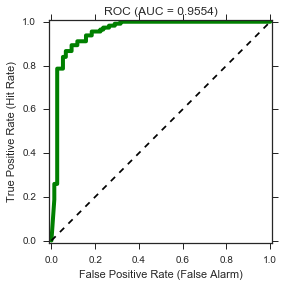

Accuracy: 0.9042 +/- 0.0528 std

[[ 64  12]
 [  9 103]]


## Forest AdaBoosted

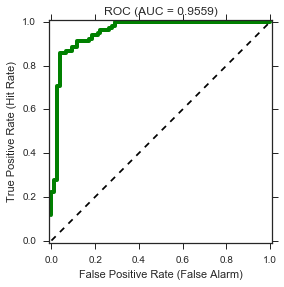

Accuracy: 0.9042 +/- 0.0265 std

[[ 63  13]
 [  9 103]]


## Tree Alone

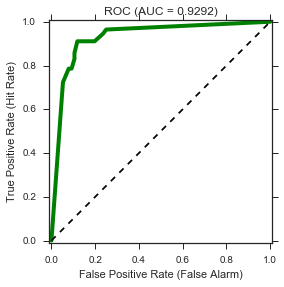

Accuracy: 0.8616 +/- 0.0325 std

[[68  8]
 [16 96]]


## Tree AdaBoosted

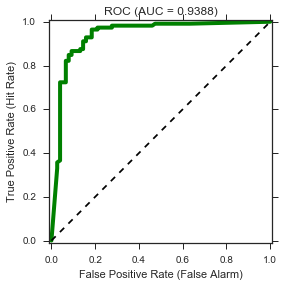

Accuracy: 0.8617 +/- 0.0136 std

[[ 64  12]
 [ 10 102]]


In [4]:
display(Markdown('# Classifier On It\'s Own vs Adaptive Boosting'))

for name, model in models.items():
    display(Markdown('## {} Alone'.format(name)))
    model.fit(x_train, y_train)
    test_model(model, x_test, y_test)
    
    display(Markdown('## {} AdaBoosted'.format(name)))
    adaptive_model = AdaBoostClassifier(model, n_estimators=500)
    adaptive_model.fit(x_train, y_train)
    test_model(adaptive_model, x_test, y_test)